In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set()

## Simple Linear Regression

### Read the csv data

In [ ]:
#predict the employee salary based their works experience
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Linear_Regression_Introduction/master/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Plot the data

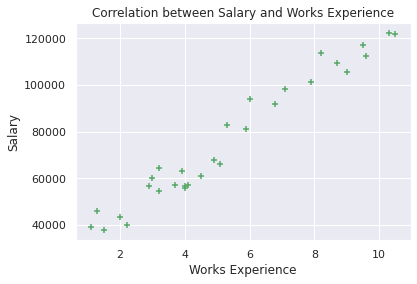

In [ ]:
%matplotlib inline
plt.title("Correlation between Salary and Works Experience")
plt.scatter(df.YearsExperience, df.Salary, color='g', marker='+')
plt.xlabel("Works Experience")
plt.ylabel("Salary")
plt.show()

### Split the Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[["YearsExperience"]], df.Salary, test_size=0.3, random_state=123)

### Model
<br>
y = ax + b<BR>
a : coef_, b : intercept_

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.predict(np.array([6.5, 10]).reshape(-1,1))

array([ 87652.27070732, 121261.23845613])

In [ ]:
reg.coef_

array([9602.56221394])

In [ ]:
reg.intercept_

25235.61631667627

In [ ]:
# y = ax + b
# now find the value of y
reg.coef_*6.5+reg.intercept_

array([87652.27070732])

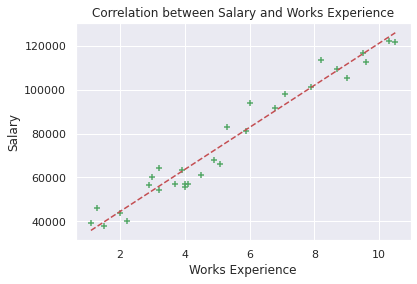

In [ ]:
plt.title("Correlation between Salary and Works Experience")
plt.scatter(df.YearsExperience, df.Salary, color='g', marker='+')
plt.plot(df.YearsExperience, reg.predict(df[['YearsExperience']]), '--r')
plt.xlabel("Works Experience")
plt.ylabel("Salary")
plt.show()

### Check Model Performance

In [ ]:
y_pred = reg.predict(x_test)
y_pred

array([ 55963.8154013 , 126062.5195631 ,  53083.04673712, 116459.95734915,
        55963.8154013 , 117420.21357055,  63645.86517246,  93413.80803569,
        63645.86517246])

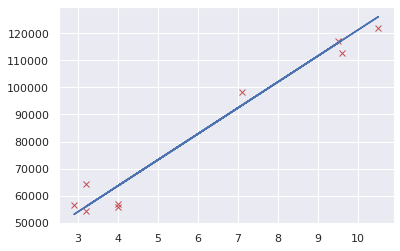

In [ ]:
plt.plot(x_test, y_test,'rx')
plt.plot(x_test, y_pred, 'b')
plt.show()

In [ ]:
print("Mean Absolute Error (MAE)      : ", mean_absolute_error(y_test, y_pred))
print("Mean Square Error (MSE)        : ", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE)  : ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE)      :  4715.961261844767
Mean Square Error (MSE)        :  28625082.091163155
Root Mean Square Error (RMSE)  :  5350.241311488964


# Multiple Linear Regression

### Read the data 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv")
df.head()
#note the target is price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Check missing value and drop unimportant feature

In [ ]:
#check missing value
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#drop unimportant feature
df.drop(['id','date'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Normalizing the data
When we use normaliaztion or standardization in our data?<br>
- When our data is not normaly distributed, you should use normalization
- When your data normaly distributed or close to normal distribution, you should use standardization

In [ ]:
x = df.drop('price', axis=1)
y = df.price

In [ ]:
minmax = MinMaxScaler().fit_transform(x)
df_scaled = pd.DataFrame(data = minmax, columns=x.columns)
df_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


### Look the correlation between each features with the price

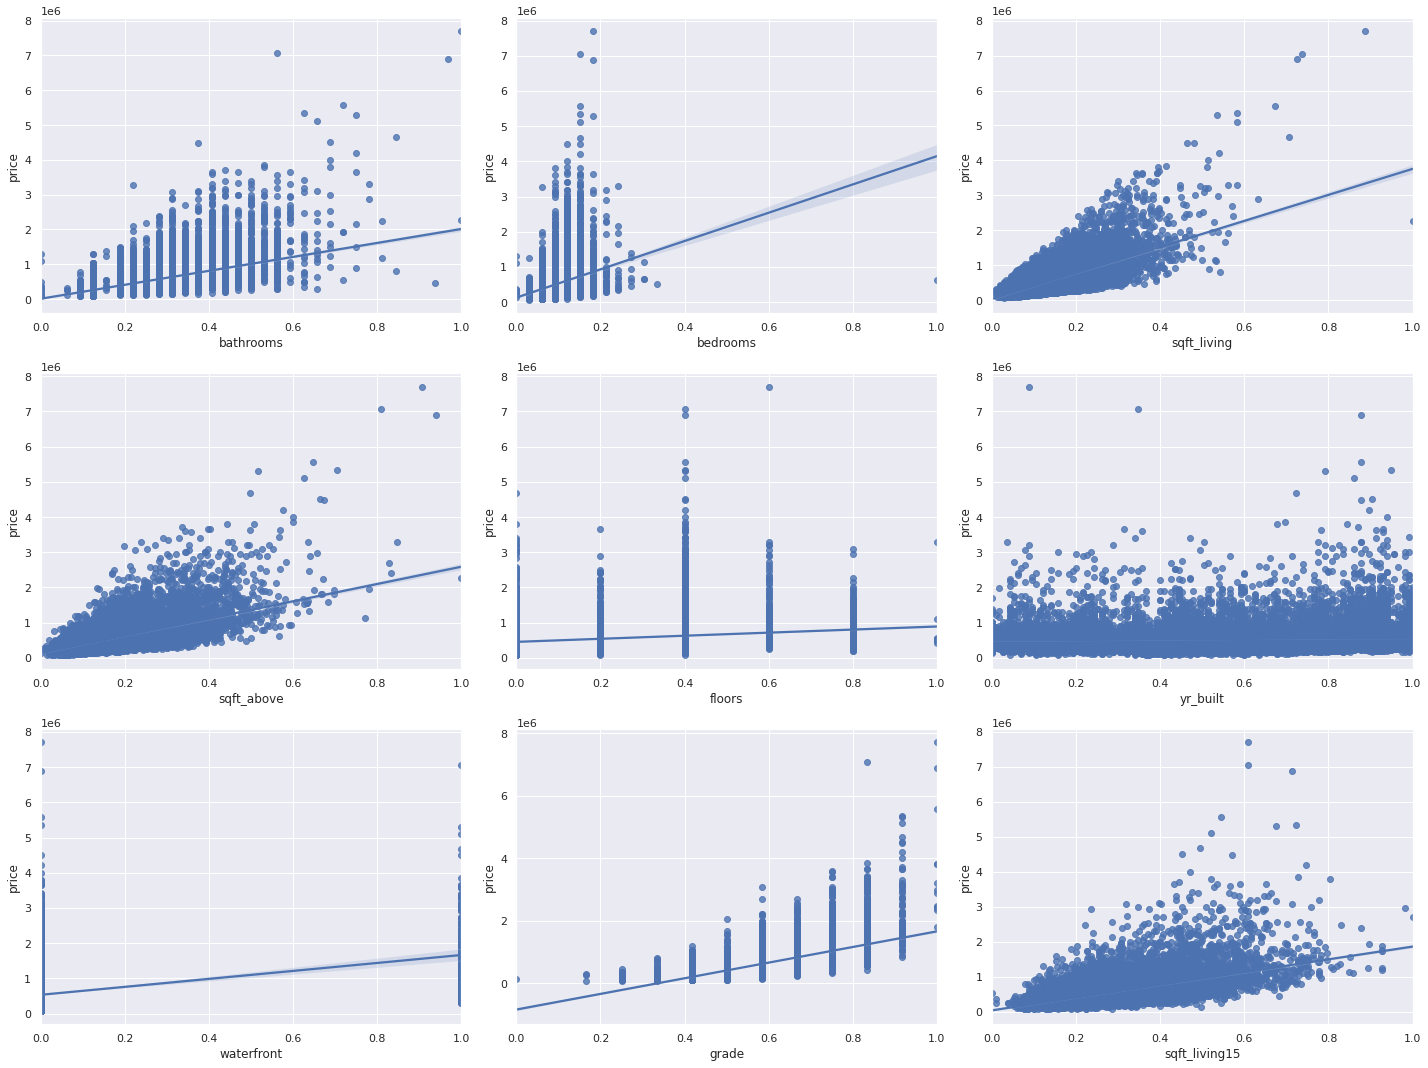

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 15))
sns.regplot(y = df['price'], x = df_scaled['bathrooms'], ax = axs[0, 0])
sns.regplot(y = df['price'], x = df_scaled['bedrooms'], ax = axs[0, 1])
sns.regplot(y = df['price'], x = df_scaled['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = df_scaled['sqft_above'], ax = axs[1, 0])
sns.regplot(y = df['price'], x = df_scaled['floors'], ax = axs[1, 1])
sns.regplot(y = df['price'], x = df_scaled['yr_built'], ax = axs[1, 2])
sns.regplot(y = df['price'], x = df_scaled['waterfront'], ax = axs[2, 0])
sns.regplot(y = df['price'], x = df_scaled['grade'], ax = axs[2, 1])
sns.regplot(y = df['price'], x = df_scaled['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()

### Corelation All Features

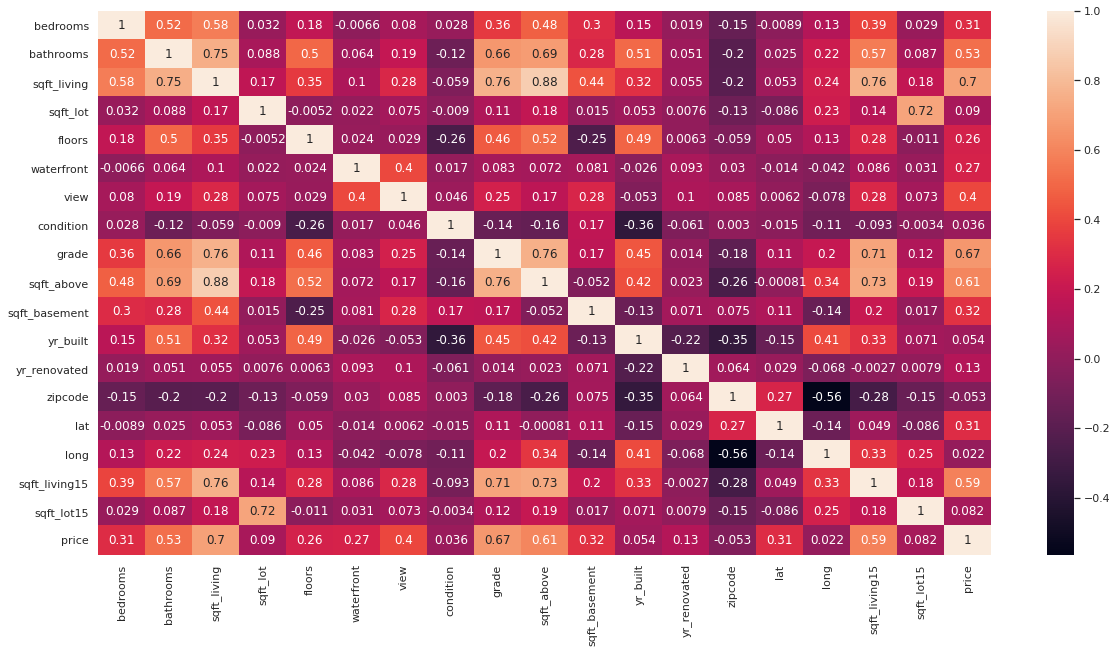

In [ ]:
data = pd.concat([df_scaled, y], axis=1)
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Split the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled[df_scaled.columns], y, test_size = 0.3, random_state=123)
#selected feature
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_scaled[selected_columns],
                                                    y, test_size = 0.3, random_state=123)

### Build Model and test using Linear Regression

In [ ]:
model = linear_model.LinearRegression(normalize = True)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([638067.17858948, 472829.72038145, 941494.53385216, ...,
       925288.04592246, 560474.38269959, 641662.63819483])

In [ ]:
print("Mean Absolute Error (MAE)      : ", mean_absolute_error(y_test, y_pred))
print("Mean Square Error (MSE)        : ", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE)  : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score                       : ", r2_score(y_test, y_pred))

Mean Absolute Error (MAE)      :  126315.48958978282
Mean Square Error (MSE)        :  39482128054.0603
Root Mean Square Error (RMSE)  :  198701.1022970439
R2 Score                       :  0.7096965261661214


**Conclusion**<br>
Smaller the RMSE means your model is good because the margin between predict price and actual price is small. R2 is percentage like accuracy, higher is better.

### Build Model Using Gradian Boosting Regressor

In [ ]:
parameters = {'criterion':['friedman_mse', 'mse'],
              'loss':['ls','huber','quantile'],
              'min_samples_split':[2,3],
              'min_samples_leaf':[1,2]}
clf = GridSearchCV(GradientBoostingRegressor(), parameters, n_jobs=4,cv=5,scoring = 'neg_mean_squared_error',verbose=10)
clf.fit(X=x_train, y=y_train)
print (clf.best_score_, clf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   21.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   30.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   48.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   59.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  5.0min finished


-18842413543.168003 {'criterion': 'mse', 'loss': 'ls', 'min_samples_leaf': 2, 'min_samples_split': 3}


In [ ]:
y_pred = clf.predict(x_test)

print("Mean Absolute Error (MAE)      : ", mean_absolute_error(y_test, y_pred))
print("Mean Square Error (MSE)        : ", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE)  : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score                       : ", r2_score(y_test, y_pred))

Mean Absolute Error (MAE)      :  77215.961719552
Mean Square Error (MSE)        :  17572543081.76771
Root Mean Square Error (RMSE)  :  132561.4690691368
R2 Score                       :  0.8707929244911095


### Conclusion
Based on the experiment results above, we can conclude that Gradien Boosting is better then Linear Regression. We can compare 2 value:
- RMSE : 132561.47 (GBR) vs 198701.10 (LR)
- R2 Score : 87,1 (GBR) vs 71 (LR)

# Garient Discent
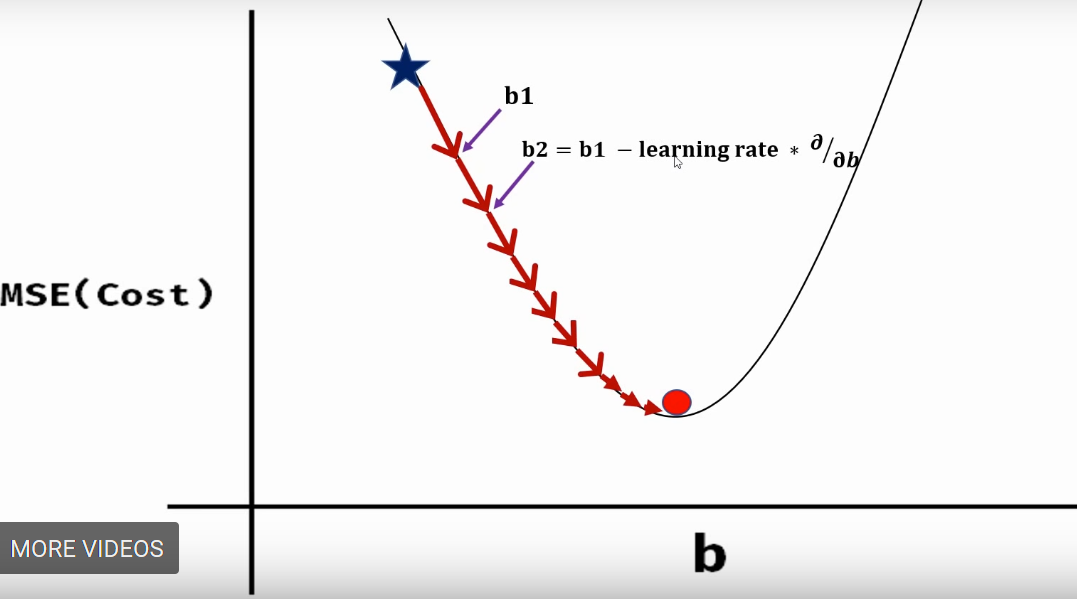
The goal of GD is to find the global minimal value<br>
Linear regression formula ==> y = mx + b

1. set the initial value of m and b to 0
2. Set the number of itterations
3. Inside the itteration, predict the y value using LR formula
4. Find the MSE value between predict_y  and actual_y 
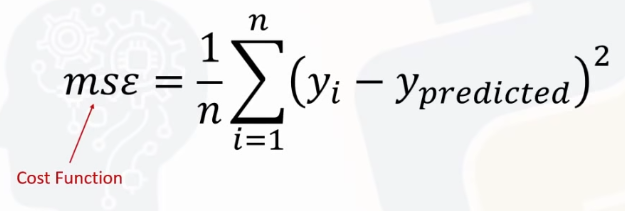
5. Use the derivative value from MSE to build m_derivative and b_deriveative
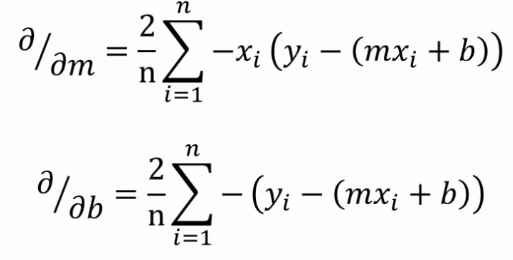
6. Update the m and b value by substract with earning rate times the derivative value
7. Print our the value of m, b, cost fucntion and itteration


In [ ]:
def gradient_discent(x,y):
  m_curr, b_curr = 0, 0
  ittr = 10000
  ndata = len(x)
  learning_rate = 0.001

  for i in range(ittr):
    y_pred = m_curr*x + b_curr
    cost = (1/ndata)*sum([val**2 for val in (y - y_pred)])
    m_dir = -(2/ndata) * sum(x*(y-y_pred))
    b_dir = -(2/ndata) * sum(y-y_pred)
    m_curr = m_curr - learning_rate * m_dir
    b_curr = b_curr - learning_rate * b_dir
    print("m : {}   | b : {}    | cost : {}   | itter : {}".format(m_curr, b_curr, cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_discent(x,y)


Streaming output truncated to the last 5000 lines.
m : 2.1159781987036776   | b : 2.5812819029965524    | cost : 0.03193377887660422   | itter : 5000
m : 2.1159389869142173   | b : 2.581423469998337    | cost : 0.031912189147685885   | itter : 5001
m : 2.1158997883821145   | b : 2.5815649891368553    | cost : 0.03189061401511098   | itter : 5002
m : 2.115860603102887   | b : 2.581706460428289    | cost : 0.031869053469010554   | itter : 5003
m : 2.1158214310720536   | b : 2.581847883888815    | cost : 0.03184750749952369   | itter : 5004
m : 2.1157822722851356   | b : 2.581989259534605    | cost : 0.03182597609679516   | itter : 5005
m : 2.115743126737655   | b : 2.5821305873818248    | cost : 0.031804459250976906   | itter : 5006
m : 2.115703994425136   | b : 2.5822718674466354    | cost : 0.03178295695222696   | itter : 5007
m : 2.115664875343103   | b : 2.5824130997451915    | cost : 0.03176146919071039   | itter : 5008
m : 2.1156257694870835   | b : 2.5825542842936424    | cost : 0

The value of m must be approximatly 2 and b approximatly 3, so we will get this formula<br>
y = 2x + 3<br>
if x 1 then, y = 2*1+3, equals 5